<a href="https://colab.research.google.com/github/quyennguyen2201/FEMAFloodingmap/blob/main/Flooding_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
# !pip install geopandas
!pip install missingno
# !pip install moviepy

     | 152.3MB 1.6MB/s
     |████████████████████████████████| 6.5MB 9.1MB/s 
     |████████████████████████████████| 225kB 40.3MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759572 sha256=aae0b34b5816045ec498f478da08a617f6fe95b764ccb74494a820119f7c2c76
  Stored in directory: /tmp/pip-ephem-wheel-cache-zbauw9ae/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=286efadbb87d8662421acf09bc1a59655b1b1b4c04fd20e15a4be6e54add0eb8
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp


In [1]:
import os
import tweepy as tw
import pandas as pd
import missingno as msno
from google.colab import drive
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
import json
import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# import geopandas as gpd
# from shapely.geometry import Point, Polygon
# import cv2 
# import os
# from moviepy.editor import ImageSequenceClip
# from PIL import Image
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn import naive_bayes 
from sklearn import linear_model
from sklearn import ensemble 
from sklearn import neighbors 
from sklearn.feature_extraction.text import CountVectorizer 

In [3]:
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Colab Notebooks"
fema_claim = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FimaNfipClaims.csv', parse_dates =['dateOfLoss'])
print(fema_claim.head(3))
print(fema_claim.dtypes)
print(fema_claim.shape)
fema_claim['yearOfLoss'] = pd.DatetimeIndex(fema_claim['dateOfLoss']).year
fema_claim['monthOfLoss'] = pd.DatetimeIndex(fema_claim['dateOfLoss']).month
fema_claim['yearmonthOfLoss'] = fema_claim['yearOfLoss'] * 100 + fema_claim['monthOfLoss']

Autosearch_keywords   Map	    st99_d00.shx
FimaNfipClaims.csv    st99_d00.dbf  tweet_text.csv
final_div_to_vid.mp4  st99_d00.shp  tweet.txt


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   agricultureStructureIndicator                  asOfDate  \
0                            0.0  2020-12-07T00:08:03.684Z   
1                            0.0  2020-12-07T00:08:03.684Z   
2                            0.0  2020-12-07T00:08:03.684Z   

   baseFloodElevation  basementEnclosureCrawlspace reportedCity  \
0                 NaN                          2.0      DETROIT   
1                 NaN                          2.0      DETROIT   
2                 NaN                          2.0      DETROIT   

  condominiumIndicator  policyCount  countyCode  \
0                    N          1.0     26163.0   
1                    N          1.0     26163.0   
2                    N          1.0     26163.0   

   communityRatingSystemDiscount                dateOfLoss  \
0                            8.0 2016-07-08 04:00:00+00:00   
1                            8.0 2014-08-11 04:00:00+00:00   
2                            8.0 2019-06-25 04:00:00+00:00   

   elevatedBuildingIndicator

In [5]:
# def draw_map_background( yearmonth):
#           KM = 1000.
#           clat = 39.3
#           clon = -94.7333
#           wid = 5500 * KM
#           hgt = 3500 * KM
#           data = fema_claim[fema_claim['yearmonthOfLoss']== yearmonth]
#           m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
#                         resolution='i', area_thresh=2500., projection='lcc',
#                         lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)

#           fig = plt.figure(figsize=(16, 8))
#           ax = fig.add_subplot(111)
#           ax.set_facecolor('#729FCF')
#           m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
#           m.drawcounties(ax=ax)
#           m.drawstates(ax=ax)
#           m.drawcountries(ax=ax)
#           m.drawcoastlines(ax=ax)
#           if data.shape[0] >0 :
#             lons  = data['longitude']
#             lats  =  data['latitude'] 
#             x, y = m(lons,lats)
#             m.scatter(x,y,3,marker='o',color='k')
#           #plt.show()
#           fig.savefig('/content/drive/MyDrive/Colab Notebooks/Map/' +  str(yearmonth) + '.png')

# drive = '/content/drive/MyDrive/Colab Notebooks/'

# thumbnail_dir = os.path.join(drive, "thumbnails")
# output_video = os.path.join(drive, 'final_div_to_vid.mp4')
# image_folder =  os.path.join(drive, "Map")
# filepaths = [float(img.replace(".png", "")) for img in os.listdir(image_folder) if img.endswith('.png')]
# yearMonthRange_new  = [float(img) for img in yearMonthRange]
# yearMonthRange_new
# new_set = list(set(yearMonthRange_new) - set(filepaths))
# yearMonthRange_new  = [int(img) for img in new_set]
# len(yearMonthRange_new)
# count = 0 
# for i in yearMonthRange_new:
#   count = count + 1 
#   print( 'finish', count/len(yearMonthRange_new) * 100, '%')
#   draw_map_background(i)
# drive = '/content/drive/MyDrive/Colab Notebooks/'
# thumbnail_dir = os.path.join(drive, "thumbnails")
# output_video = os.path.join(drive, 'final_div_to_vid.mp4')
# image_folder =  os.path.join(drive, "Map")
# filepaths = [img for img in os.listdir(image_folder) if img.endswith('.png')]
# directory = {}
# for root, dirs, files in os.walk(image_folder):
#     for fname in files:
#         filepath = os.path.join(root, fname)
#         #print(filepath)
#         try:
#             key = float(fname.replace(".png", ""))
#             print(key)
#         except:
#             key = None
#         if key != None:
#             directory[key] = filepath
# new_path = []
# for k in sorted(directory.keys()):
#     filepath = directory[k]
#     new_path.append(filepath)
# clip = ImageSequenceClip(new_path, fps=5)
# clip.write_videofile(output_video)

In [6]:
print(fema_claim.head(10))

   agricultureStructureIndicator                  asOfDate  \
0                            0.0  2020-12-07T00:08:03.684Z   
1                            0.0  2020-12-07T00:08:03.684Z   
2                            0.0  2020-12-07T00:08:03.684Z   
3                            0.0  2020-12-07T00:08:03.684Z   
4                            0.0  2020-12-07T00:08:03.684Z   
5                            0.0  2020-12-07T00:08:03.684Z   
6                            0.0  2020-12-07T00:08:03.684Z   
7                            0.0  2020-12-07T00:08:03.684Z   
8                            0.0  2020-12-07T00:08:03.684Z   
9                            0.0  2020-12-07T00:08:03.684Z   

   baseFloodElevation  basementEnclosureCrawlspace   reportedCity  \
0                 NaN                          2.0        DETROIT   
1                 NaN                          2.0        DETROIT   
2                 NaN                          2.0        DETROIT   
3                 NaN                    

In [ ]:
#EDA analysis 
fema_claim.columns
fema_claim.dtypes

In [8]:
amount_columns = [column for column in  fema_claim.columns if ('amount' in column)]
print(amount_columns)

['amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim']


In [22]:
for column in amount_columns:
  fema_claim[column] =fema_claim[column].fillna(0)
fema_claim['total_amountPaid']  = fema_claim['amountPaidOnBuildingClaim'] + fema_claim['amountPaidOnContentsClaim'] +fema_claim['amountPaidOnIncreasedCostOfComplianceClaim']

In [23]:
full_columns = fema_claim.columns
date_columns = [column for column in full_columns if ('date' in column)|('Date' in column)] 
other_columns = list(set(full_columns) - set(amount_columns) - set(date_columns) - set(['id']))
indicator_columns =  [column for column in full_columns if ('Indicator' in column)] 
print(amount_columns)
print(date_columns)
print(other_columns)
print(indicator_columns)

['amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim', 'total_amountPaid']
['asOfDate', 'dateOfLoss', 'originalConstructionDate', 'originalNBDate']
['Indicator_amountPaidOnBuildingClaim', 'rateMethod', 'floodZone', 'postFIRMConstructionIndicator', 'nonProfitIndicator', 'state', 'reportedZipcode', 'obstructionType', 'latitude', 'houseWorship', 'numberOfFloorsInTheInsuredBuilding', 'totalBuildingInsuranceCoverage', 'countyCode', 'communityRatingSystemDiscount', 'primaryResidence', 'policyCount', 'lowestFloorElevation', 'elevatedBuildingIndicator', 'totalContentsInsuranceCoverage', 'censusTract', 'elevationCertificateIndicator', 'smallBusinessIndicatorBuilding', 'Indicator_amountPaidOnContentsClaim', 'reportedCity', 'monthOfLoss', 'Indicator_total_amountPaid', 'lowestAdjacentGrade', 'baseFloodElevation', 'basementEnclosureCrawlspace', 'agricultureStructureIndicator', 'condominiumIndicator', 'occupancyType', 'Indicator_amountPaidOnIncreased

In [24]:
for column in other_columns:
  print(column)
  print(len(fema_claim[column].unique()))
  print(fema_claim[column].value_counts())

Indicator_amountPaidOnBuildingClaim
2
1.0    1833033
0.0     671575
Name: Indicator_amountPaidOnBuildingClaim, dtype: int64
rateMethod
27
1      1900265
7       342267
2        58404
B        34312
3        33150
1        29211
G        16671
R        12930
Q         7663
P         3033
W         2918
4         2403
A         1619
3         1232
8         1008
9          943
S          483
5          195
7          179
2          138
6           97
E           54
F            9
T            1
9.0          1
4.0          1
Name: rateMethod, dtype: int64
floodZone
73
AE     736563
X      385476
A      193037
C      171370
B      120703
A04     53183
A01     51882
A05     50670
A06     49315
A08     48774
A07     45941
A10     42655
A03     42655
AHB     33832
A02     32234
VE      32113
A11     31001
A09     27895
A14     24901
A13     22328
A15     22045
A12     18528
AO      14943
A99     10189
A17      9646
AH       9433
AOB      8914
A16      7850
A20      5891
V12      5692
D       

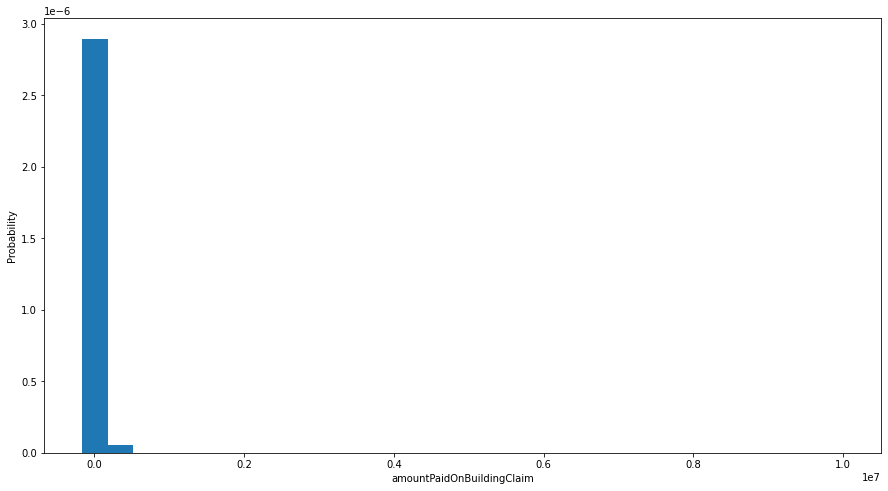

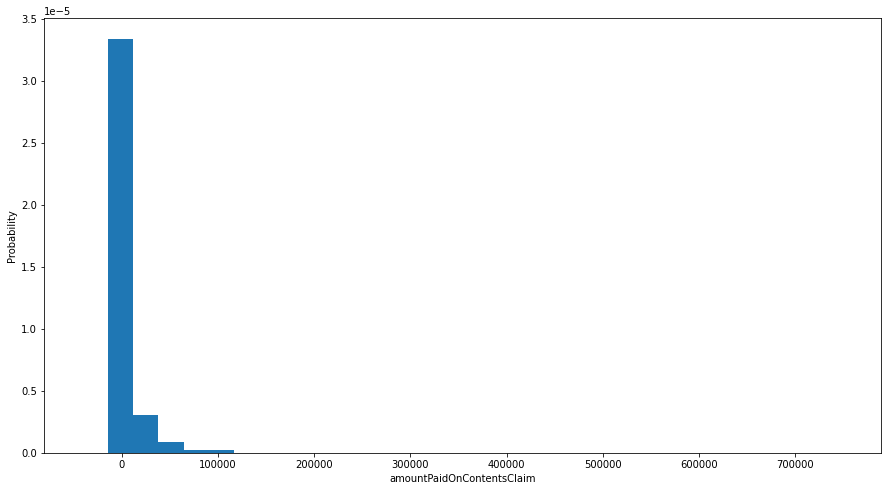

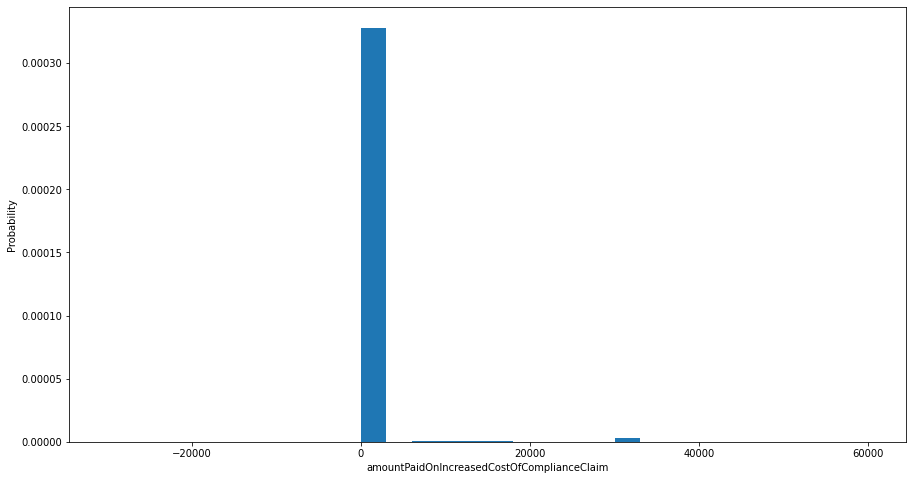

In [12]:
for column in amount_columns:
  plt.figure(figsize=(15,8))
  plt.hist(fema_claim[column], density = True, bins = 30)
  plt.ylabel('Probability')
  plt.xlabel(column)
  plt.show()

In [13]:
amount_columns = [column for column in  fema_claim.columns if ('amount' in column)]
for column in amount_columns:
  fema_claim['Indicator_' + column]  = np.where(fema_claim[column] > 0 , 1.0, 0.0 )  
  print(fema_claim['Indicator_'+ column].describe())


count    2.504608e+06
mean     7.318642e-01
std      4.429888e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Indicator_amountPaidOnBuildingClaim, dtype: float64
count    2.504608e+06
mean     3.663056e-01
std      4.817945e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Indicator_amountPaidOnContentsClaim, dtype: float64
count    2.504608e+06
mean     1.581126e-02
std      1.247448e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Indicator_amountPaidOnIncreasedCostOfComplianceClaim, dtype: float64
count    2.504608e+06
mean     7.734304e-01
std      4.186118e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Indicator_total_amountPaid, dtype: float64


In [14]:
7.318642e-01
1.659421e-02
1.581126e-02
7.734304e-01

0.7734304

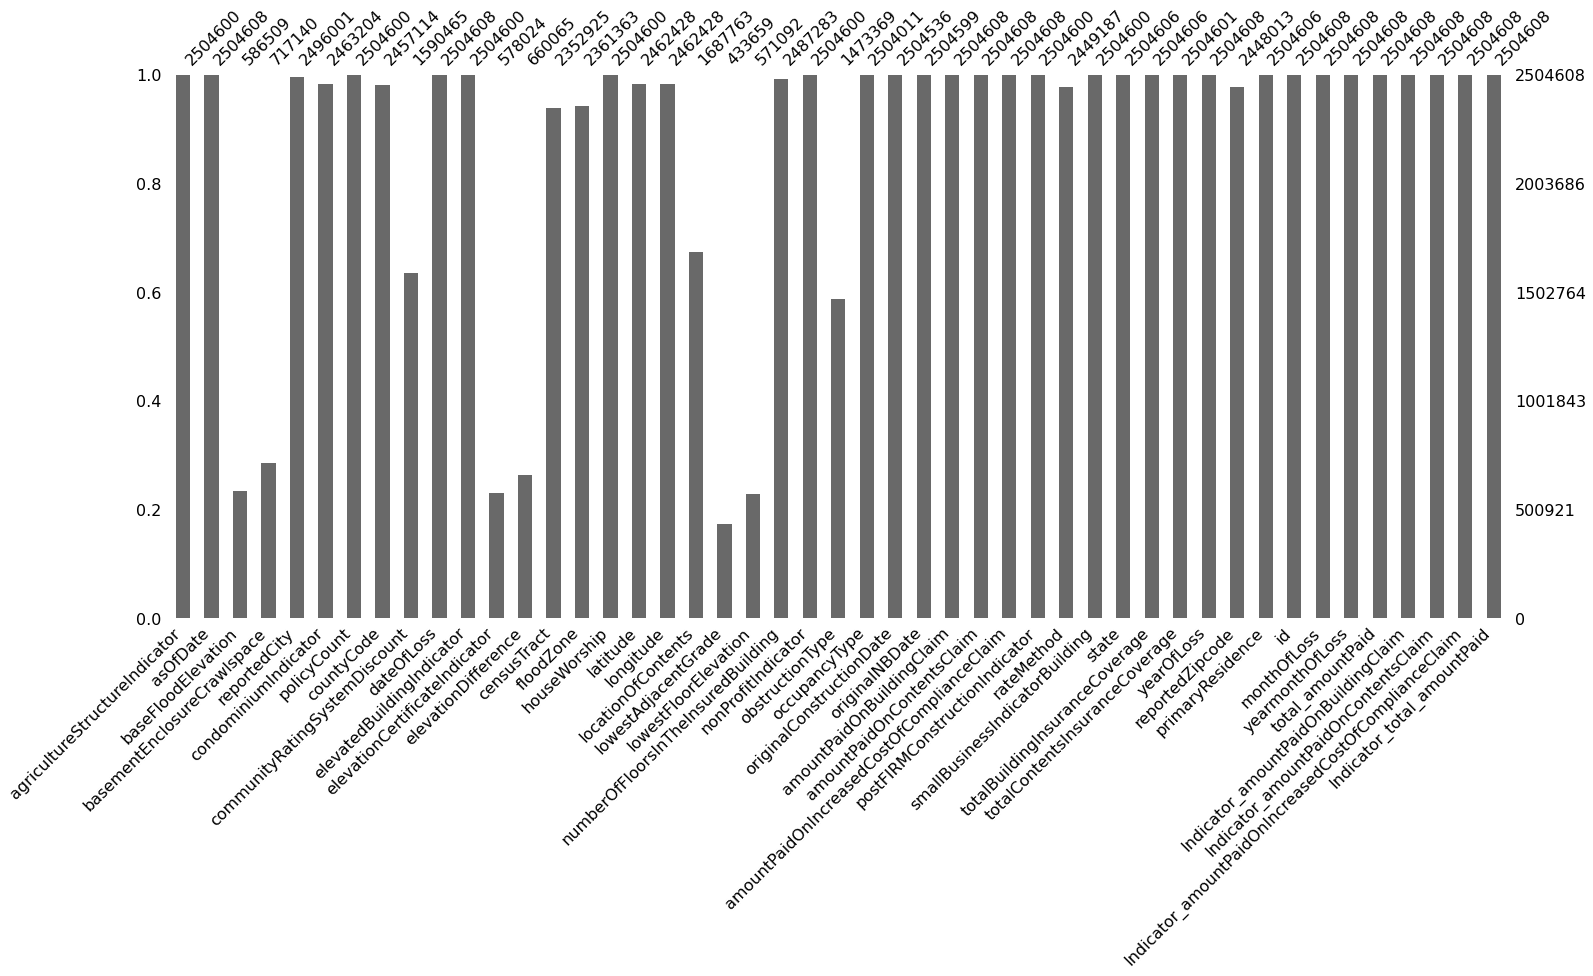

In [15]:
msno.bar(fema_claim)

In [16]:
data_description = {'agricultureStructureIndicator':"Yes (Y) or No (N) indicator of whether or not a building is reported as being an agricultural structure in the policy application. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'",\
                    'asOfDate': "The effective date of the data in the file. When time is not specified in the field, it will default to T00:00:00.000Z	",\
                   'baseFloodElevation':  "Base Flood Elevation (BFE) is the elevation at which there is a 1% chance per year of flooding in feet from the elevation certificate	",\
                   'basementEnclosureCrawlspace': "Basement is defined for purposes of the NFIP as any level or story which has its floor subgrade on all sides. Basement structure values are as follows: 0 - none; 1 - Finished Basement/Enclosure; 2 - Unfinished Basement/Enclosure; 3 - Crawlspace; 4 - Subgrade Crawlspace;",\
                   'reportedCity':  'This is the city of the insured property as reported to us by our Write Your Own (WYO) partners',\
                    'condominiumIndicator':"This is an indicator of what type of condominium property is being insured. Condominium Code - 1 character; Not a condominium (N); An individual condominium unit owned by a unit owner, or by a condominium association (U); The entire condominium building owned by the association insuring building common elements as well as building elements (additions and alterations) within all units in the building, not eligible under Condominium Master Policy (A); The entire residential condominium building owned by the association eligible under Condominium Master Policy, insuring the entire condominium building common elements as well as building elements (additions and alterations) within all units in the building, (H) for High-Rise or (L) for Low-Rise; Townhouses (T);	",\
                    'policyCount': 'Insured units in an active status. A policy contract ceases to be in an active status as of the cancellation date or the expiration date. Residential Condominium Building Association Policy (RCBAP) contracts are stored as a single policy contract but insure multiple units and therefore represent multiple policies	',\
                    'countyCode':  'FIPS code uniquely identifying the primary County (e.g., 011 represents Broward County) associated with the project. Note, the County Code field may not reflect the individual county the property is located as projects can be associated with more than one county	',\
                    'communityRatingSystemDiscount':"The Community Rating System (CRS) Classification Credit Percentage used to rate the policy. The insurance premium credit is based on whether a property is in or out of the Special Flood Hazard Area (SFHA) as shown on the community's Flood Insurance Rate Map. The premium credit for properties in the SFHA increases according to a community's CRS class: 1 - SFHA 45% ** Non SFHA 10% **; 2 - SFHA 40% ** Non SFHA 10% **; 3 - SFHA 35% ** Non SFHA 10% **; 4 - SFHA 30% ** Non SFHA 10% **; 5 - SFHA 25% ** Non SFHA 10% **; 6 - SFHA 20% ** Non SFHA10% **; 7 - SFHA 15% ** Non SFHA 5% **; 8 - SFHA 10% ** Non SFHA 5% **; 9 - SFHA 5% Non SFHA 5%; 10 - SFHA 0% Non SFHA 0%; *For the purpose of determining CRS Premium Discounts, all AR and A99 zones are treated as non-SFHAs. **These percentages are subject to change. Always refer to the Flood Insurance Manual for the latest information	",\
                    'dateOfLoss': "Date on which water first entered the insured building. When time is not specified in the field, it will default to T00:00:00.000Z	",\
                    'elevatedBuildingIndicator': "Yes (Y) or No (N) indicator of whether or not a building meets the NFIP definition of an elevated building. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. An elevated building is a no-basement building that was constructed so as to meet the following criteria: 1. The top of the elevated floor (all A zones) or the bottom of the lowest horizontal structural member of the lowest floor (all V zones) is above ground level. 2. The building is adequately anchored. 3. The method of elevation is pilings, columns (posts and piers), shear walls (not in V zones), or solid foundation perimeter walls (not in V zones)",\
                    'elevationCertificateIndicator': "Indicates if a policy has been rated with elevation certificate. (An empty value indicates that this information was not reported; it does not necessarily mean that these properties do not have an elevation certificate, just that one was not reported at the time the policy was written.) 1 - No Elevation Certificate, original effective date prior to October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Base Flood Elevation' +2 to +4 feet rates; 2 - No Elevation Certificate, original effective date on or after October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Elevation Certificate' rates; 3 - Elevation Certificate with BFE. Policies will be rated using 'With Base Flood Elevation' rates; 4 - Elevation Certificate without BFE. Policies will be rated using 'No Base Flood Elevation' rates",\
                    'elevationDifference': 'Difference in feet between the elevation of the lowest floor used for rating or the floodproofed elevation and the base flood elevation (BFE), or base flood depth, as appropriate from the elevation certificate	',\
                    'censusTract': 'US Census Bureau defined census Tracts; statistical subdivisions of a county or equivalent entity that are updated prior to each decennial census. The NFIP relies on our geocoding service to assign census tract code. 11-digit code defining census tract	',\
                    'floodZone': "Flood zone derived from the Flood Insurance Rate Map (FIRM) used to rate the insured property. A - Special Flood with no Base Flood Elevation on FIRM; AE, A1-A30 - Special Flood with Base Flood Elevation on FIRM; A99 - Special Flood with Protection Zone; AH, AHB* - Special Flood with Shallow Ponding; AO, AOB* - Special Flood with Sheet Flow; X, B - Moderate Flood from primary water source. Pockets of areas subject to drainage problems; X, C - Minimal Flood from primary water source. Pockets of areas subject to drainage problems; D - Possible Flood; V - Velocity Flood with no Base Flood Elevation on FIRM; VE, V1-V30 - Velocity Flood with Base Flood Elevation on FIRM; AE, VE, X - New zone designations used on new maps starting January 1, 1986, in lieu of A1-A30, V1-V30, and B and C; AR - A Special Flood Hazard Area that results from the decertification of a previously accredited flood protection system that is determined to be in the process of being restored to provide base flood protection; AR Dual Zones - (AR/AE, AR/A1-A30, AR/AH, AR/AO, AR/A) Areas subject to flooding from failure of the flood protection system (Zone AR) which also overlap an existing Special Flood Hazard Area as a dual zone; *AHB, AOB, ARE, ARH, ARO, and ARA are not risk zones shown on a map, but are acceptable values for rating purposes	",\
                    'houseWorship':"Yes (Y) or No (N) indicator of whether or not a building is reported as being a house of worship in the policy application. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'",\
                    'latitude': "Approximate latitude of the insured building (to 1 decimal place). This represents the approximate location of the insured property. The precision has been lessened to ensure individual privacy. This may result in a point location that exists in an incorrect county or state. Use the state and county fields for record aggregation for these dimensions",\
                    'locationOfContents': "Code that indicates the location of contents, (e.g. garage on property, in house, etc.): 1 - Basement/Subgrade Crawlspace only; 2 - Basement/Subgrade Crawlspace and above; 3 - Lowest floor only above ground level (no basement/enclosure/crawlspace/subgrade crawlspace); 4 - Lowest floor above ground level and higher floors (no basement/enclosure/crawlspace/subgrade crawlspace); 5 - Above ground level more than one full floor; 6 - Manufactured (mobile) home or travel trailer on foundation; 7 - Enclosure/Crawlspace and above;",\
                    'longitude':'Approximate longitude of the insured building (to 1 decimal place). This represents the approximate location of the insured property. The precision has been lessened to ensure individual privacy. This may result in a point location that exists in an incorrect county or state. Use the state and county fields for record aggregation for these dimensions',\
                    'lowestAdjacentGrade':'Lowest natural grade adjacent to the insured structure prior to excavating or filling. The difference in feet of the lowest natural grade adjacent to the building from the reference level of the building	',\
                    'lowestFloorElevation': "A building's lowest floor is the floor or level (including basement/enclosure/crawlspace/subgrade crawlspace) that is used as the point of reference when rating a building. This includes the level to which a building is floodproofed*. The elevation in feet of the reference level of the building from the elevation certificate",\
                    'numberOfFloorsInTheInsuredBuilding': "Code that indicates the number of floors in the insured building. 1 = One floor; 2= Two floors; 3 = Three or more floors; 4 = Split-level; 5 = Manufactured (mobile) home or travel trailer on foundation; 6 = Townhouse/Rowhouse with three or more floors (RCBAP Low-rise only);	",\
                    'nonProfitIndicator': "Yes (Y) or No (N) indicator of whether or not a building is reported as being a non-profit in the policy application. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'	",\
                    'obstructionType':"Code that gives the type of obstruction (if any) in the enclosure (if any). With obstruction: enclosure/crawlspace with proper openings not used for rating (not applicable in V zones) - 15; With obstruction: less than 300 sq. ft. with breakaway walls, but no machinery or equipment attached to building below lowest elevated floor, or elevation of machinery/equipment is at or above Base Flood Elevation - 20; With obstruction: less than 300 sq. ft. with breakaway walls or finished enclosure and with machinery or equipment attached to building below lowest elevated floor, and elevation of machinery/equipment is below Base Flood Elevation - 24; With obstruction: 300 sq. ft. or more with breakaway walls, but no machinery or equipment attached to building below the Base Flood Elevation - 30; With obstruction: 300 sq. ft. or more with breakaway walls or finished enclosure and with machinery or equipment attached to building below the Base Flood Elevation - 34; With obstruction: no walls, but the elevation of machinery or equipment attached to building is below Base Flood Elevation (NOTE: Use Obstruction Type '10' and Without Obstruction Rate Table if the elevation of machinery/equipment is at or above Base Flood Elevation.) - 40; With obstruction: nonbreakaway walls/crawlspace or finished enclosure with no machinery or equipment attached to building below lowest elevated floor - 50; With obstruction: nonbreakaway walls/crawlspace or finished enclosure with machinery or equipment attached to building below lowest elevated floor - 54; With obstruction - 60; With Certification subgrade crawlspace (AE, A01-A30, unnumbered A, AO, AH, AOB, AHB zones) - 70; Without Certification subgrade crawlspace (all zones) - 80; With Enclosure: Elevated buildings with elevator below the BFE in A zones. No other enclosure below the BFE. - 90; Free of Obstruction: Elevated buildings with lattice, slats, or shutters (including louvers) enclosing the elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. The building will be rated free of obstruction with the V zone elevator loading added to the building basic limit. - 91; With Enclosure: Elevated buildings with elevator below the BFE in A zones. Enclosure below the BFE has no proper openings, is finished, or is used for other than parking, building access, or storage. - 92; With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. - 94; With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is unfinished and elevator and obstruction are located below the BFE, but no machinery and equipment (M&E) servicing the building is located below the BFE. - 95; With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is finished or is used for other than parking, building access, or storage. - 96; With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction, but has M&E servicing the building located below the BFE. - 97; With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway walls obstruction and M&E servicing the building are located below the BFE. - 98;",\
                    'occupancyType': "Code indicating the use and occupancy type of the insured structure. One-digit code: 1=single family residence; 2 = 2 to 4 unit residential building; 3 = residential building with more than 4 units; 4 = Non-residential building;	",\
                    'originalConstructionDate': "The original date of the construction of the building. When time is not specified in the field, it will default to T00:00:00.000Z",\
                    'originalNBDate': "The original date of the flood policy. When time is not specified in the field, it will default to T00:00:00.000Z	",\
                    'amountPaidOnBuildingClaim': "Dollar amount paid on the building claim. In some instances, a negative amount may appear which occurs when a check issued to a policy holder isn't cashed and has to be re-issued	",\
                    'amountPaidOnContentsClaim': "Dollar amount paid on the contents claim. In some instances, a negative amount may appear, which occurs when a check issued to a policy holder isn't cashed and has to be re-issued	",\
                    'amountPaidOnIncreasedCostOfComplianceClaim': "Dollar amount paid on the Increased Cost of Compliance (ICC) claim. Increased Cost of Compliance (ICC) coverage is one of several flood insurances resources for policyholders who need additional help rebuilding after a flood. It provides up to $30,000 to help cover the cost of mitigation measures that will reduce the flood risk",\
                    'postFIRMConstructionIndicator': "Yes or No Indicator on whether construction was started before or after publication of the FIRM. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. For insurance rating purposes, buildings for which the start of construction or substantial improvement was after December 31, 1974, or on or after the effective date of the initial FIRM for the community, whichever is later, are considered Post-FIRM construction",\
                    'rateMethod': "Indicates policy rating method: 1 - Manual; 2 - Specific; 3 - Alternative; 4 - V-Zone Risk Factor Rating Form; 5 - Underinsured Condominium Master Policy; 6 - Provisional; 7 - Preferred Risk Policy (PRPs issued for eligible properties located within a non-Special Flood Hazard Area [non-SFHA]); 8 - Tentative; 9 - MPPP Policy; A - Optional Post-1981 V Zone; B - Pre-FIRM policies with elevation rating - Flood Insurance Manual rate tables; E - FEMA Pre-FIRM Special Rates; F - Leased Federal Property; G - Group Flood Insurance Policy (GFIP); P - Preferred Risk Policy (A PRP renewal issued in the first year following a map revision for an eligible property that was newly mapped into the SFHA by the map revision, or new business written for an eligible property that was newly mapped into the SFHA by a map revision effective on or after October 1, 2008 - PRP Eligibility Extension); Q - Preferred Risk Policy (subsequent PRP renewals where the previous policy year was reported as a 'P' or 'Q'); S - FEMA Special Rates; T - Severe Repetitive Loss Properties (formerly Target Group Full Risk). Effective October 1, 2013, code will no longer be valid; W - Pre-FIRM policies with elevation rating - Submit-for-Rate procedures;	",\
                    'smallBusinessIndicatorBuilding': "Yes (Y) or No (N) indicator of whether or not the insured represents a small business. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. Small business is defined as a business with fewer than 100 employees in the policy application	",\
                    'state': "The two-character alpha abbreviation of the state in which the insured property is located	",\
                    'totalBuildingInsuranceCoverage': "Total Insurance Amount in dollars on the Building	",\
                    'totalContentsInsuranceCoverage': "Total Insurance Amount in dollars on the Contents	",\
                    'yearofLoss': "Year of Loss = Year in which the flood loss occurred	",\
                    'reportedZipCode': "5-digit Postal Zip Code of the insured property	",\
                    'primaryResidence': "Yes (Y) or No (N) indicator of whether or not a building is a primary residence. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. A primary residence is a single family building, condominium unit, apartment unit, or unit within a cooperative building that will be lived in by the policyholder or the policyholder's spouse for: More than 50% of the 365 calendar days following the current policy effective date; or 50% or less of the 365 calendar days following the current policy effective date if the policyholder has only one residence and does not lease that residence to another party or use it as rental or income property at any time during the policy term. A policyholder and the policyholder's spouse may not collectively have more than one primary residence"}

In [25]:
#Feature engineeering 
data_label = {'agricultureStructureIndicator': {1: 'Agricultural structure', 0: 'Non agricultural structure'},
              'basementEnclosureCrawlspace': {0: 'None', 1: 'Finished Basement/Enclosure', 2: 'Unfinished Basement/Enclosure', 3: 'Crawlspace', 4: 'Subgrade Crawlspace'},\
              'condominiumIndicator': {'N': 'Not a condominium', 'U':'An individual condominium unit owned by a unit owner, or by a condominium association ',\
                                       'L':'Low-Rise ',\
                                       'H':'High-Rise',\
                                       'U':'An individual condominium unit owned by a unit owner, or by a condominium association',\
                                       'A': 'The entire condominium building owned by the association insuring building common elements'},\
              'communityRatingSystemDiscount': {1: 'SFHA 45% ** Non SFHA 10% **',\
                                                2: 'SFHA 40% ** Non SFHA 10% **',\
                                                3: 'SFHA 35% ** Non SFHA 10% **',\
                                                4:  'SFHA 30% ** Non SFHA 10% **',\
                                                5: 'SFHA 25% ** Non SFHA 10% **', \
                                                6: 'SFHA 20% ** Non SFHA10% **', \
                                                7:  'SFHA 15% ** Non SFHA 5% **' , \
                                                8:  'SFHA 10% ** Non SFHA 5% **',\
                                                9:  'SFHA 5% Non SFHA 5%',\
                                                10: 'SFHA 0% Non SFHA 0%' },\
              'elevatedBuildingIndicator': {1:'elevated building', 0:'non elevated building'},\
              'elevationCertificateIndicator': {1: 'No Elevation Certificate, original effective date prior to October 1, 1982', \
                                                2: 'No Elevation Certificate, original effective date on or after October 1, 1982', \
                                                3: 'Elevation Certificate with BFE',\
                                                4: 'Elevation Certificate without BFE'}, \
              'floodZone': {'A': 'Special Flood with no Base Flood Elevation on FIRM',\
                            'AE': 'Special Flood with Base Flood Elevation on FIRM',\
                            'A1-A30':'Special Flood with Base Flood Elevation on FIRM',\
                            'A99': 'Special Flood with Protection Zone',\
                            'AH': 'Special Flood with Shallow Ponding',\
                            'AHB*': 'Special Flood with Shallow Ponding',\
                            'AO': 'Special Flood with Sheet Flow',\
                            'AOB': 'Special Flood with Sheet Flow',\
                            'X': 'Moderate Flood from primary water source. Pockets of areas subject to drainage problems',\
                            'B': 'Moderate Flood from primary water source. Pockets of areas subject to drainage problems',\
                            'X': 'Minimal Flood from primary water source. Pockets of areas subject to drainage problems', \
                            'C' : 'Minimal Flood from primary water source. Pockets of areas subject to drainage problems', \
                            'D':  'Possible Flood',\
                            'V':  'Velocity Flood with no Base Flood Elevation on FIRM',\
                            'VE': 'Velocity Flood with Base Flood Elevation on FIRM',\
                            'V1-V30': 'Velocity Flood with Base Flood Elevation on FIRM',\
                            'AE': 'New zone designations used on new maps starting January 1, 1986',\
                            'VE': 'New zone designations used on new maps starting January 1, 1986',\
                            'X': 'New zone designations used on new maps starting January 1, 1986',\
                            'AR': 'A Special Flood Hazard Area that results from the decertification of a previously accredited flood protection system',\
                            'AHB':  'are not risk zones shown on a map, but are acceptable values for rating purposes',\
                            'AOB': 'are not risk zones shown on a map, but are acceptable values for rating purposes',\
                            'ARE': 'are not risk zones shown on a map, but are acceptable values for rating purposes',\
                            'ARH': 'are not risk zones shown on a map, but are acceptable values for rating purposes',\
                            'ARO': 'are not risk zones shown on a map, but are acceptable values for rating purposes',\
                            'ARA': 'are not risk zones shown on a map, but are acceptable values for rating purposes'                        
                            },\
              
              'houseWorship': {1: 'Worship house', 0: 'None'},\
              'locationOfContents': {1: 'Basement/Subgrade Crawlspace only',2: 'Basement/Subgrade Crawlspace and above',\
                                     3: 'Lowest floor only above ground level (no basement/enclosure/crawlspace/subgrade crawlspace)',\
                                     4: 'Lowest floor above ground level and higher floors (no basement/enclosure/crawlspace/subgrade crawlspace)',\
                                     5: 'Above ground level more than one full floor', \
                                     6: 'Manufactured (mobile) home or travel trailer on foundation', \
                                     7: 'Enclosure/Crawlspace and above'} ,\
                'numberOfFloorsInTheInsuredBuilding': {1: 'One floor',\
                                                       2: 'Two floors',\
                                                       3: 'Three or more floors',\
                                                       4: 'Split-level',\
                                                       5: 'Manufactured (mobile) home or travel trailer on foundation',\
                                                       6: 'Townhouse/Rowhouse with three or more floors (RCBAP Low-rise only)'},\
              'nonProfitIndicator': {1: 'non Profit', 0: 'Other'},\
              'obstructionType': {15: 'With obstruction: enclosure/crawlspace with proper openings not used for rating (not applicable in V zones) -',\
                                  20: 'With obstruction: less than 300 sq. ft. with breakaway walls, but no machinery ',\
                                  24: 'With obstruction: less than 300 sq. ft. with breakaway walls or finished enclosure and with machinery or equipment attached to building\
                                   below lowest elevated floor, and elevation of machinery/equipment is below Base Flood Elevation',\
                                  30: 'With obstruction: 300 sq. ft. or more with breakaway walls, but no machinery or equipment attached to building below the Base Flood Elevation',\
                                  34: 'With obstruction: 300 sq. ft. or more with breakaway walls or finished enclosure and with machinery or equipment attached to building below the Base Flood Elevation',\
                                  40: 'With obstruction: no walls, but the elevation of machinery or equipment attached to building is below Base Flood Elevation',\
                                  50: 'With obstruction: nonbreakaway walls/crawlspace or finished enclosure with no machinery or equipment attached to building below lowest elevated floor',\
                                  54: 'With obstruction: nonbreakaway walls/crawlspace or finished enclosure with machinery or equipment attached to building below lowest elevated floor',\
                                  60: 'With obstruction' ,\
                                  70: 'With Certification subgrade crawlspace (AE, A01-A30, unnumbered A, AO, AH, AOB, AHB zones)',\
                                  80: 'Without Certification subgrade crawlspace (all zones)',\
                                  90: 'With Enclosure: Elevated buildings with elevator below the BFE in A zones. No other enclosure below the BFE',\
                                  91: 'Free of Obstruction', \
                                  92: 'With Enclosure',\
                                  94: 'With Obstruction',\
                                  97: 'With Obstruction: Elevated buildings with elevator below the BFE in V zones',\
                                  95: 'With Obstruction: Elevated buildings with elevator below the BFE in V zones',\
                                  96: 'With Obstruction: Elevated buildings with elevator below the BFE in V zones',\
                                  98: 'With Obstruction: Elevated buildings with elevator below the BFE in V zones'},\
              'occupancyType': {1: 'single family residence',\
                                2: '2 to 4 unit residential building',\
                                3: 'residential building with more than 4 units',\
                                4: 'Non-residential building'},\
              'postFIRMConstructionIndicator': {1:  'postFIRMConstruction', 0: 'other'},\
              'rateMethod': {1: 'Manual',\
                             2: 'Specific',\
                             3: 'Alternative', \
                             4: 'V-Zone Risk Factor Rating Form',\
                             5: 'Underinsured Condominium Master Policy',\
                             6: 'Provisional',\
                             7: 'Preferred Risk Policy (PRPs issued for eligible properties located within a non-Special Flood Hazard Area [non-SFHA])',\
                             8: 'Tentative',\
                             9: 'MPPP Policy',\
                             'A': 'Optional Post-1981 V Zone',\
                             'B': 'Pre-FIRM policies with elevation rating - Flood Insurance Manual rate tables',\
                             'E': 'FEMA Pre-FIRM Special Rates',\
                             'F': 'Leased Federal Property',\
                             'G': 'Group Flood Insurance Policy (GFIP)',\
                             'P': 'Preferred Risk Policy',\
                             'Q': 'Preferred Risk Policy',\
                             'S': 'FEMA Special Rates',\
                             'T': 'Severe Repetitive Loss Properties'},\
              'smallBusinessIndicatorBuilding': {1: 'smallBusiness', 0: 'No'},\
              'primaryResidence': {1: 'Primary residence', 0: 'No'}

}

In [18]:
fema_claim['yearOfLoss'] = pd.DatetimeIndex(fema_claim['dateOfLoss']).year
fema_claim['monthOfLoss'] = pd.DatetimeIndex(fema_claim['dateOfLoss']).month
fema_claim['yearmonthOfLoss'] = fema_claim['yearOfLoss'] * 100 + fema_claim['monthOfLoss']

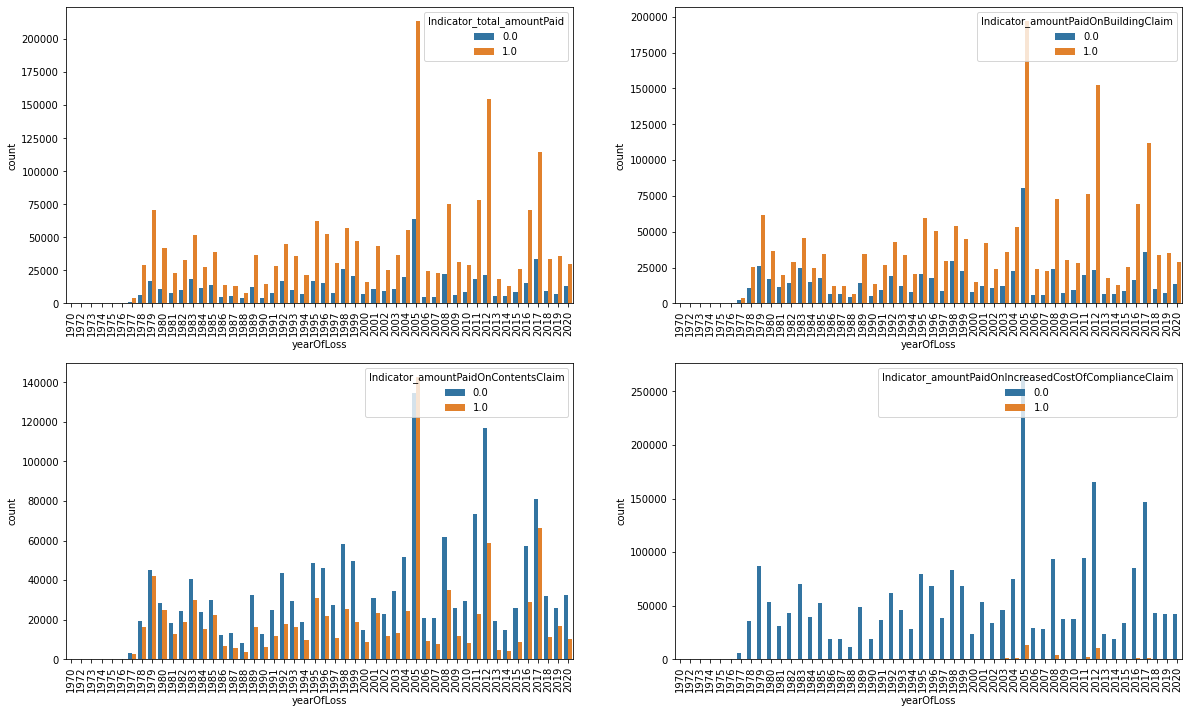

In [26]:
#Plot trend over time 
fig = plt.figure(figsize= (20, 12))
ax = fig.add_subplot(221)
sns.countplot(data=fema_claim, x="yearOfLoss", hue="Indicator_total_amountPaid")
plt.xticks(rotation=90)
ax = fig.add_subplot(222)
sns.countplot(data=fema_claim, x="yearOfLoss", hue="Indicator_amountPaidOnBuildingClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(223)
sns.countplot(data=fema_claim, x="yearOfLoss", hue="Indicator_amountPaidOnContentsClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(224)
sns.countplot(data=fema_claim, x="yearOfLoss", hue="Indicator_amountPaidOnIncreasedCostOfComplianceClaim")
plt.xticks(rotation=90)
plt.show()


In [20]:
fema_claim.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [34]:
amount_columns = [column for column in  fema_claim.columns if (('amount' in column) & ('dicator' not in column))]
indicator_columns = [column for column in  fema_claim.columns if ('Indicator_amount' in column) ]
payment_columns = amount_columns + indicator_columns 

summary1 = pd.DataFrame(pd.pivot_table(data = fema_claim, values= payment_columns , index = 'yearOfLoss').to_records())
summary2 = pd.DataFrame(pd.pivot_table(data = fema_claim, values= amount_columns , index = 'yearOfLoss', aggfunc='sum').to_records())
summary3 = pd.DataFrame(pd.pivot_table(data = fema_claim, values='Indicator_total_amountPaid', index = 'yearOfLoss', aggfunc='count').to_records())

summary = pd.merge(summary1, summary2, how='left', left_on ='yearOfLoss', right_on = 'yearOfLoss')
summary = pd.merge(summary, summary3, how='left', left_on ='yearOfLoss', right_on = 'yearOfLoss')

print(summary)
path = '/content/drive/MyDrive/Colab Notebooks/'

summary.to_csv(path + 'summary.csv')

    yearOfLoss  Indicator_amountPaidOnBuildingClaim  \
0         1970                             0.000000   
1         1972                             0.000000   
2         1973                             0.333333   
3         1974                             0.307692   
4         1975                             0.444444   
5         1976                             0.500000   
6         1977                             0.618140   
7         1978                             0.706215   
8         1979                             0.703897   
9         1980                             0.684916   
10        1981                             0.636877   
11        1982                             0.670904   
12        1983                             0.648937   
13        1984                             0.625083   
14        1985                             0.664266   
15        1986                             0.659684   
16        1987                             0.645395   
17        

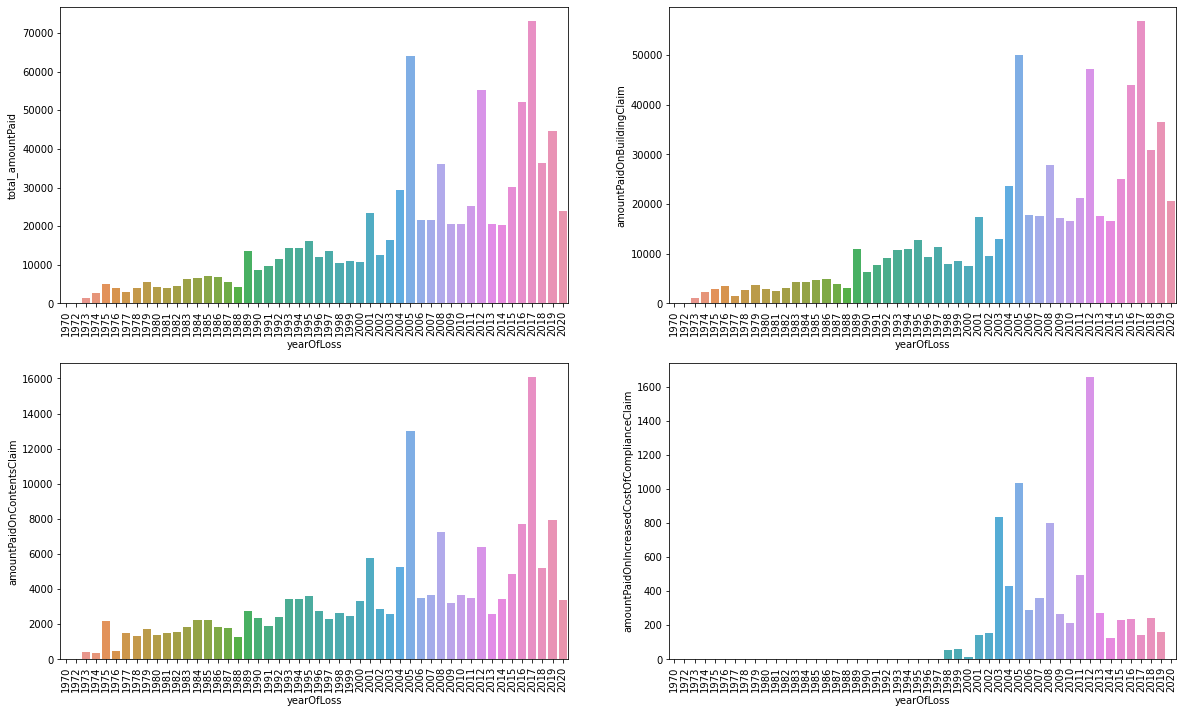

In [38]:
#Plot trend over time 
fig = plt.figure(figsize= (20, 12))
ax = fig.add_subplot(221)
sns.barplot(data=summary1, x="yearOfLoss", y="total_amountPaid")
plt.xticks(rotation=90)
ax = fig.add_subplot(222)
sns.barplot(data=summary1, x="yearOfLoss", y="amountPaidOnBuildingClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(223)
sns.barplot(data=summary1, x="yearOfLoss", y="amountPaidOnContentsClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(224)
sns.barplot(data=summary1, x="yearOfLoss", y="amountPaidOnIncreasedCostOfComplianceClaim")
plt.xticks(rotation=90)
plt.show()

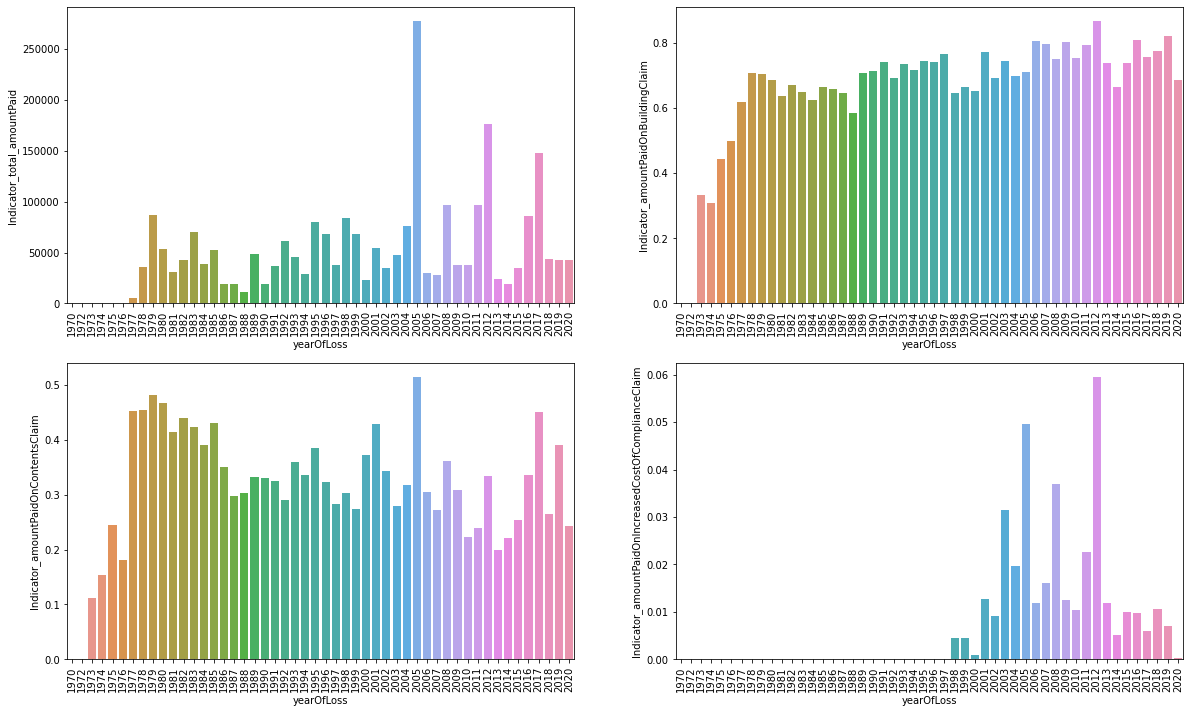

In [41]:
#Plot trend over time 
fig = plt.figure(figsize= (20, 12))
ax = fig.add_subplot(221)
sns.barplot(data=summary3, x="yearOfLoss", y="Indicator_total_amountPaid")
plt.xticks(rotation=90)
ax = fig.add_subplot(222)
sns.barplot(data=summary1, x="yearOfLoss", y="Indicator_amountPaidOnBuildingClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(223)
sns.barplot(data=summary1, x="yearOfLoss", y="Indicator_amountPaidOnContentsClaim")
plt.xticks(rotation=90)
ax = fig.add_subplot(224)
sns.barplot(data=summary1, x="yearOfLoss", y="Indicator_amountPaidOnIncreasedCostOfComplianceClaim")
plt.xticks(rotation=90)
plt.show()

In [43]:
dummy_indicator = ['agricultureStructureIndicator','elevatedBuildingIndicator','condominiumIndicator','elevationCertificateIndicator', 'nonProfitIndicator','smallBusinessIndicatorBuilding','primaryResidence',\
                   'floodZone','houseWorship','locationOfContents','numberOfFloorsInTheInsuredBuilding',\
                   'obstructionType','occupancyType','postFIRMConstructionIndicator','rateMethod',
                   'basementEnclosureCrawlspace','baseFloodElevation','reportedCity',]

In [5]:
fema_claim_withdummy = fema_claim.copy()
for column in dummy_indicator:
  print(column)
  origin_column = len(fema_claim_withdummy.columns)
  temp = pd.get_dummies(fema_claim_withdummy[column] ,prefix = column + '_') 
  fema_claim_withdummy = fema_claim_withdummy.drop(column, axis=1)
  fema_claim_withdummy  = fema_claim_withdummy.join(temp)
  new_column = len(fema_claim_withdummy.columns)
  print('Add in', new_column  - origin_column + 1, 'columns')

NameError: ignored

In [4]:
dummy_indicator = [column for column in fema_claim_withdummy.columns if '_' in column]
dummy_indicator

NameError: ignored

In [2]:
def Classifier(y_train, X_train, X_test, label, \
               algorithms = ['nbayes', 'nearest', 'logit', 'SVM', 'LDA','tree','gboost','rf'],\
              rf_trees=200, seed=12345):
  classify_dict ={}

  if 'nbayes' in algorithms:
    ts = time.time()
    clf_nb = naive_bayes.MultinomialNB()
    clf_nb.fit(X_train, y_train)
    classify_dict['nbayes'] = clf_nb.predict(X_test).tolist()
    te = time.time()
    print("Time for Naive Bayes: {} seconds".format(round(te-ts, 2)))


  if 'nearest' in algorithms:
    ts = time.time()
    clf_nn = neighbors.KNeighborsClassifier()
    clf_nn.fit(X_train, y_train)
    classify_dict['nearest'] = clf_nn.predict(X_test).tolist()

  if 'logit' in algorithms:
    ts = time.time()
    clf_logit = linear_model.LogisticRegression()
    clf_logit.fit(X_train, y_train)
    classify_dict['nearest'] = clf_logit.predict(X_test).tolist()

  if 'SVM' in algorithms:
    ts = time.time()
    clf_svm = svm.SVC(C=100, probability=True, random_state=seed)
    clf_svm.fit(X_train, y_train)
    classify_dict['svm'] = clf_svm.predict(X_test).tolist()

  if 'LDA' in algorithms:
    ts = time.time()
    clf_lda = lda.LDA()
    clf_lda.fit(X_train, y_train)
    classify_dict['LDA'] = clf_lda.predict(X_test).tolist()


  if 'tree' in algorithms:
    ts = time.time()
    clf_tree = tree.DecisionTreeClassifier(random_state=seed)
    clf_tree.fit(X_train, y_train)
    classify_dict['tree'] = clf_tree.predict(X_test).tolist()


  if 'gboost' in algorithms:
    ts = time.time()
    clf_gboost = ensemble.GradientBoostingClassifier(random_state=seed)
    clf_gboost.fit(X_train, y_train)
    classify_dict['gboost'] = clf_gboost.predict(X_test).tolist()

  if 'rf' in algorithms:
    ts = time.time()
    clf_rf = ensemble.RandomForestClassifier(n_estimators=rf_trees, random_state=seed)
    clf_rf.fit(X_train, y_train)
    classify_dict['rf'] = clf_rf.predict(X_test).tolist()
  return classify_dict 

In [ ]:
X_name =  []
y_name = 'Indicator_total_amountPaid'